In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import os

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import pylab

In [2]:
os.chdir(os.getcwd() + "\\Data")
os.listdir()

['DATA.csv', 'PURCHASE SENTIMENT.docx']

In [3]:
Purchase_sentiment = pd.read_csv("DATA.csv")

In [81]:
df = Purchase_sentiment.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [82]:
for i in df:
    print(df[i].value_counts())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00299342       1
P00305442       1
P00107442       1
P00077542       1
P00106342       1
Name: Product_ID, Length: 3631, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [83]:
df["Stay_In_Current_City_Years"].replace("4+","4", inplace = True)
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype("int64")
df["Product_ID"] = df["Product_ID"].apply(lambda x : x[1:])
df["Product_ID"] = df["Product_ID"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


In [84]:
def missing_value_percentage(df):
    
    mis_values = df.isnull().sum()
    
    percentage = 100 * df.isnull().sum() / len(df)
    
    new_df = pd.concat([mis_values, percentage], axis = 1)
    new_df.columns = ["missing values", "percentage"]
    
    sorted_df = new_df[new_df.iloc[:,1] != 0].sort_values("percentage" ,ascending = False)
    
    return (sorted_df)
missing_value_percentage(df)

,missing values,percentage
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643


In [85]:
df.fillna(0, inplace = True)

# <a>2. Handeling Categorical Features

In [86]:
df_ob = df.select_dtypes("object")
df_num = df.drop(df_ob, axis = 1)

for i in df_ob:
    print(i, df_ob[i].nunique())

Gender 2
Age 7
City_Category 3


## <a>2.1 One Hot Encoding

In [87]:
df_HE = pd.DataFrame(df_ob["Gender"])
df_HE["Gender"] = pd.get_dummies(df_HE, drop_first = True)
df_HE.head()

,Gender
0,0
1,0
2,0
3,0
4,1


## <a>2.2 Ordinal Encoding 

In [88]:
df_OE = df_ob[["Age", "City_Category"]]

In [89]:
df_OE["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [90]:
d = {'0-17' : 0, 
     '55+' : 6, 
     '26-35' : 2, 
     '46-50' : 4, 
     '51-55' : 5, 
     '36-45' : 3, 
     '18-25' : 1}
df_OE["Age"] = df_OE["Age"].map(d)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
df_OE["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [92]:
d = {"A" : 0,
     "B" : 1,
     "C" : 2}
df_OE["City_Category"] = df_OE["City_Category"].map(d)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
df_OE.head()

,Age,City_Category
0,0,0
1,0,0
2,0,0
3,0,0
4,6,2


## <a>2.3 Mean Encoding

In [94]:
df_ME = pd.concat([df_ob, df_num["Purchase"]], axis = 1)

In [95]:
for i in df_ME:
    df_mean = df_ME.groupby([i])["Purchase"].mean().to_dict()
    df_ME[i] = df_ME[i].map(df_mean)
df_ME.head()

,Gender,Age,City_Category,Purchase
0,8734.565765,8933.464640,8911.939216,8370
1,8734.565765,8933.464640,8911.939216,15200
2,8734.565765,8933.464640,8911.939216,1422
3,8734.565765,8933.464640,8911.939216,1057
4,9437.526040,9336.280459,9719.920993,7969


In [96]:
for i in df_ob:
    print(i, df_ob[i].nunique(), df_ME[i].nunique())

Gender 2 2
Age 7 7
City_Category 3 3


## <a>2.4 Final Concatenation

In [97]:
df_new = pd.concat([df_HE, df_OE, df_num], axis = 1)
df_new.head()

,Gender,Age,City_Category,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,1000001,69042,10,2,0,3,0.0,0.0,8370
1,0,0,0,1000001,248942,10,2,0,1,6.0,14.0,15200
2,0,0,0,1000001,87842,10,2,0,12,0.0,0.0,1422
3,0,0,0,1000001,85442,10,2,0,12,14.0,0.0,1057
4,1,6,2,1000002,285442,16,4,0,8,0.0,0.0,7969


# <a>3. Outliers Treatment

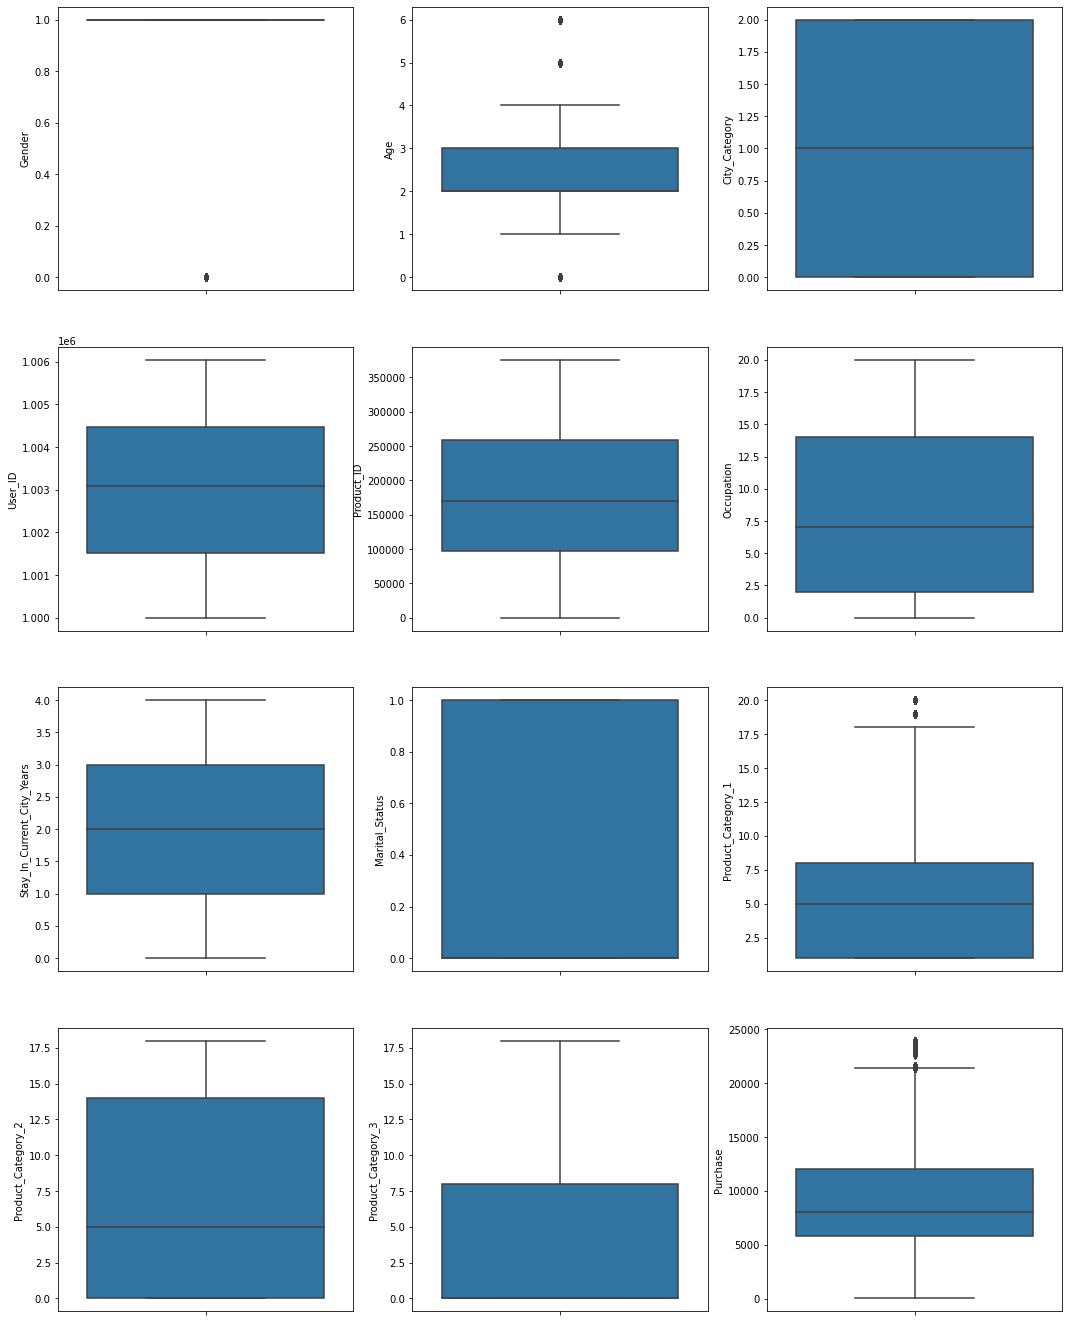

In [102]:
def distplot(data):
    plt.figure(figsize = (18,24))
    plotnumber = 1
    for i in data:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize = 20)
        plotnumber += 1
    plt.show()

def QQplot(data):
    for i in data:
        plt.figure(figsize = (14,5))
        plt.subplot(1,2,1)
        data[i].hist()
        plt.subplot(1,2,2)
        stat.probplot(data[i],dist = 'norm',plot = pylab)
        plt.xlabel(i)
        plt.show()

def boxplot(data):
    plt.figure(figsize = (18,24))
    plotnumber = 1
    for i in data:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y = data[i])
        plotnumber += 1
    plt.show()
boxplot(df_new)

In [103]:
df_out = pd.DataFrame(df_new["Purchase"])

## <a>3.1. Quantile Method

In [104]:
df_QM = df_out.copy()

In [105]:
def outliers(data):
    lw = []
    ow = []
    for i in data.columns:
        q1,q3 = data[i].quantile([.25,.75])
        lo = q1-1.5*(q3-q1)
        uo = q3+1.5*(q3-q1)
        lw.append(lo)
        ow.append(uo)

    j = 0 
    for i in data:
        if j < len(lw):
            data.loc[data[i] <= lw[j],i] = lw[j]
            data.loc[data[i] >= ow[j],i] = ow[j]
        j += 1

    return(data)

df_QM = outliers(df_QM)

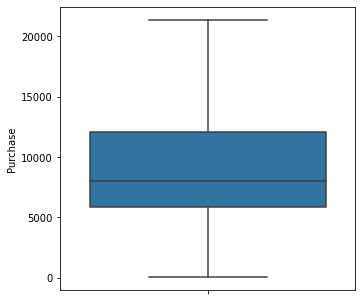

In [106]:
boxplot(df_QM)

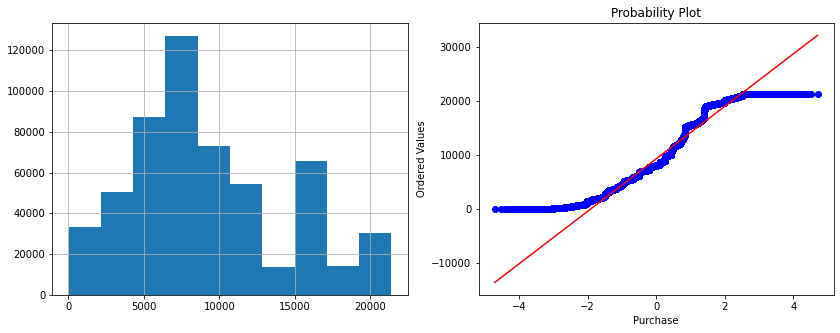

In [107]:
QQplot(df_QM)

## <a>3.2. 3-Sigma Method

In [108]:
df_SM = df_out.copy()

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


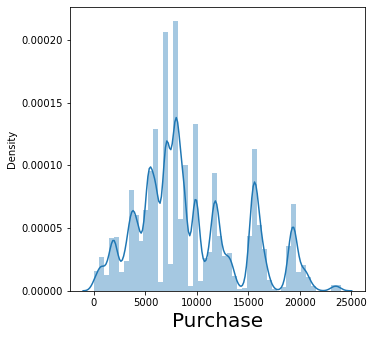

In [109]:
distplot(df_SM)

In [110]:
def sigma_outlier(data):
    min_sigma = []
    max_sigma = []
    for i in data:
        min_3sigma = data[i].mean() - 3*data[i].std()
        max_3sigma = data[i].mean() + 3*data[i].std()
        min_sigma.append(min_3sigma)
        max_sigma.append(max_3sigma)
       
    j=0
    for i in data:
        if j < len(min_sigma):
            data.loc[data[i] <= min_sigma[j],i] = min_sigma[j]
            data.loc[data[i] >= max_sigma[j],i] = max_sigma[j]
        j+=1

    return(data)
df_SM = sigma_outlier(df_SM)

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


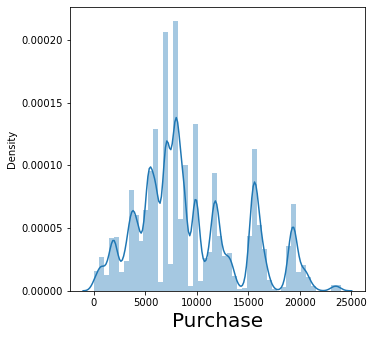

In [111]:
distplot(df_SM)

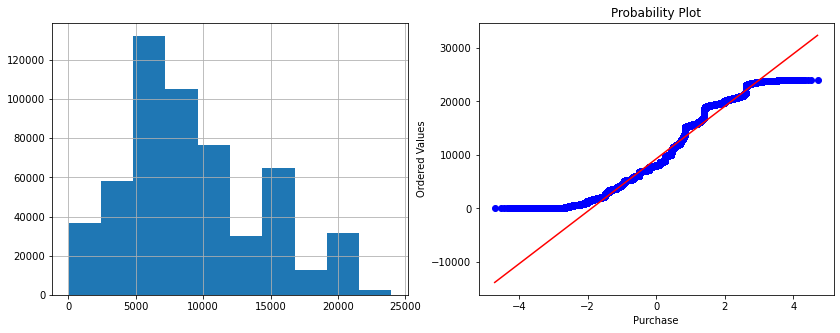

In [112]:
QQplot(df_SM)

## <a>3.3 Best Method - 3-Sigma Method

In [113]:
df_new = pd.concat([df_new.iloc[:,:-1], df_SM["Purchase"]], axis = 1)
df_new.head()

,Gender,Age,City_Category,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,1000001,69042,10,2,0,3,0.0,0.0,8370.0
1,0,0,0,1000001,248942,10,2,0,1,6.0,14.0,15200.0
2,0,0,0,1000001,87842,10,2,0,12,0.0,0.0,1422.0
3,0,0,0,1000001,85442,10,2,0,12,14.0,0.0,1057.0
4,1,6,2,1000002,285442,16,4,0,8,0.0,0.0,7969.0


# <a>4. Feature Selection

In [114]:
df_FS = df_new.copy()

In [115]:
X = df_FS.iloc[:,:-1]
y = df_FS["Purchase"]

In [116]:
def barplot(data):
    plt.figure(figsize = (12,12))
    data.plot(kind = "bar")

## <a>4.1 Filter Method

In [117]:
def Filter(model):
    skb = SelectKBest(score_func = model, k = "all")
    skb.fit(X,y)
    
    df_score = pd.DataFrame(skb.scores_, columns = ["score"], index = X.columns)
    df_score.sort_values(by = ["score"], ascending = False, inplace = True)
    return(df_score)

### <a>4.1.1 f_regression()

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [119]:
df_f_regression = Filter(f_regression)
df_f_regression

,score
Product_Category_1,73684.939778
Product_Category_3,49940.037585
Product_ID,6010.047181
City_Category,2116.717629
Gender,2010.442472
Product_Category_2,1508.006232
Occupation,238.831156
Age,138.024704
Stay_In_Current_City_Years,16.173125
User_ID,12.232347


<Figure size 864x864 with 0 Axes>

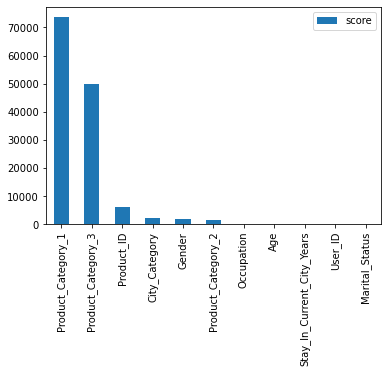

In [120]:
barplot(df_f_regression)

## <a>4.1.2 Correlation

<AxesSubplot:>

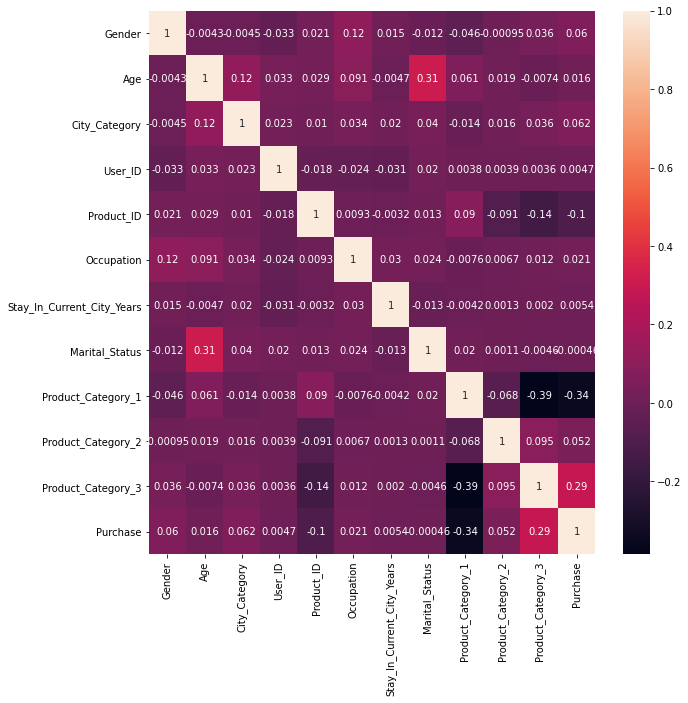

In [121]:
corr = df_FS.iloc[:,:].corr()
top_features = corr.index
plt.figure(figsize = (10,10))
sns.heatmap(df_FS[top_features].corr(),annot = True)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["column"] = X.columns

vif.sort_values(ascending = False, by = "VIF")

,VIF,column
3,18.773694,User_ID
1,5.003262,Age
0,4.120958,Gender
4,4.011357,Product_ID
8,3.415065,Product_Category_1
6,3.081817,Stay_In_Current_City_Years
2,2.933490,City_Category
5,2.594659,Occupation
9,2.211270,Product_Category_2
7,1.876859,Marital_Status


## <a>4.2 Wrapper Method (OLS Method)

In [123]:
import statsmodels.api as sm

In [124]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Gender', 'Age', 'City_Category', 'User_ID', 'Product_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


## <a>4.3 Embedded Method

### <a>4.3.1 Lasso Method

In [125]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel

In [126]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 53654.604458
Best score using built-in LassoCV: 0.010808


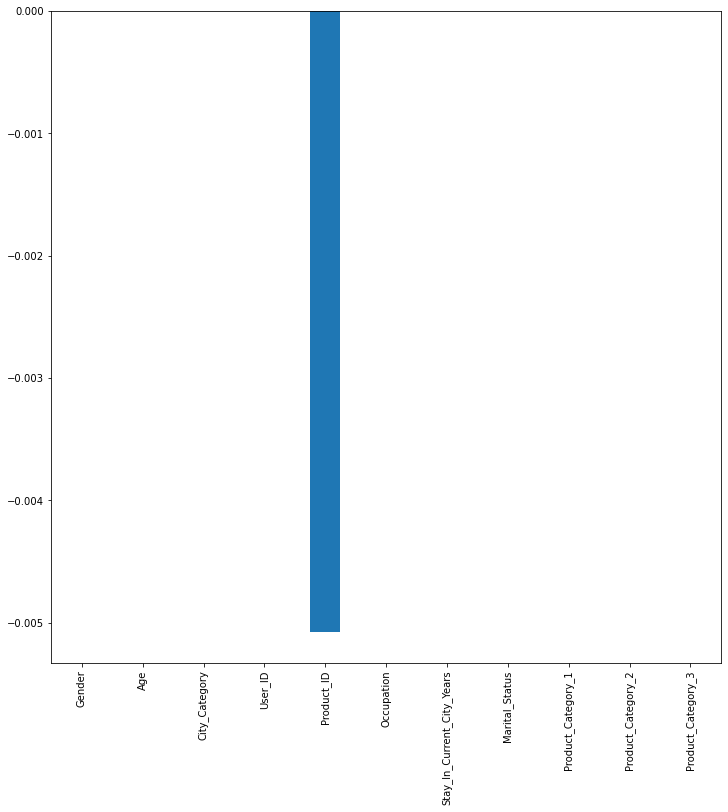

In [127]:
barplot(coef)

## <a>4.4 Features Selected

In [132]:
df_new = df_FS[["Product_Category_1", "Product_Category_3", "Product_ID", 
                "City_Category", "Gender", "Product_Category_2", "Purchase"]]
df_new.head()

,Product_Category_1,Product_Category_3,Product_ID,City_Category,Gender,Product_Category_2,Purchase
0,3,0.0,69042,0,0,0.0,8370.0
1,1,14.0,248942,0,0,6.0,15200.0
2,12,0.0,87842,0,0,0.0,1422.0
3,12,0.0,85442,0,0,14.0,1057.0
4,8,0.0,285442,2,1,0.0,7969.0


# <a>5. Feature Scaling

## <a>5.1 Standardization

In [129]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns = df_new.columns)
df_scaled.head()

,Product_Category_1,Product_Category_3,Product_ID,City_Category,Gender,Product_Category_2,Purchase
0,-0.610809,-0.614641,-1.028774,-1.371516,-1.746513,-1.083654,-0.177973
1,-1.118912,1.625106,0.722139,-1.371516,-1.746513,-0.118323,1.181756
2,1.675656,-0.614641,-0.845799,-1.371516,-1.746513,-1.083654,-1.561193
3,1.675656,-0.614641,-0.869157,-1.371516,-1.746513,1.168785,-1.633858
4,0.659449,-0.614641,1.077382,1.259336,0.572570,-1.083654,-0.257805


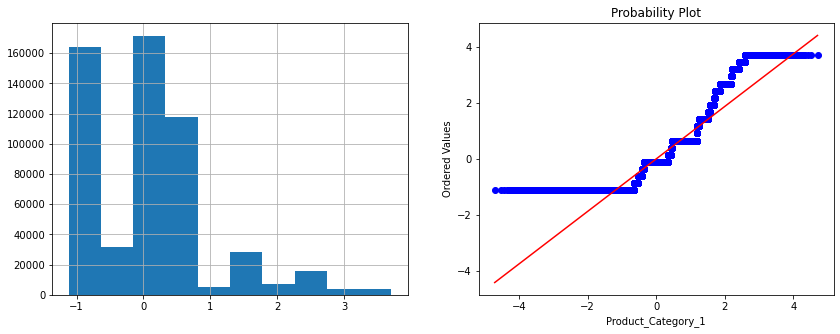

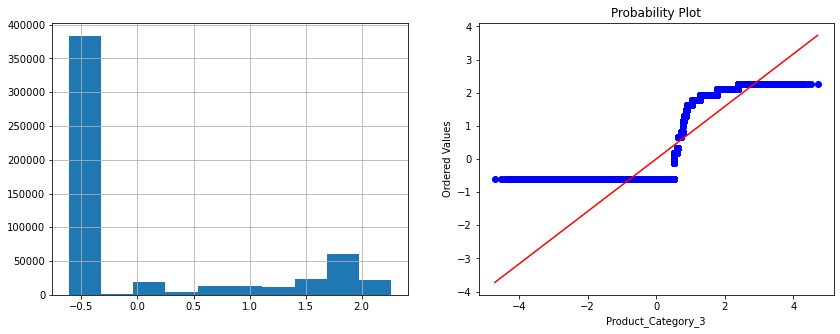

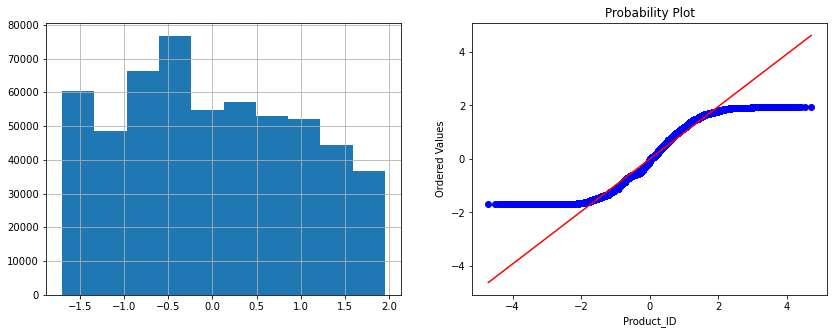

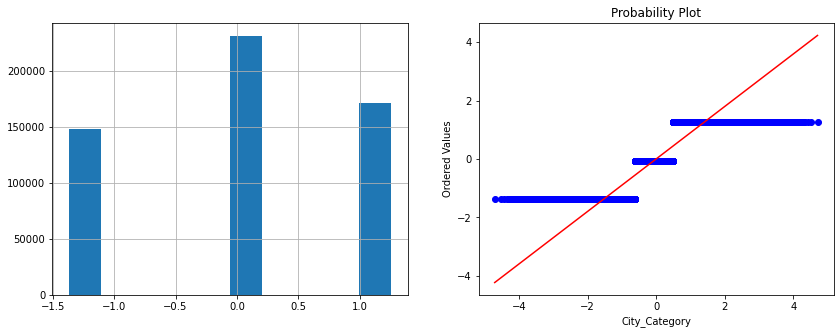

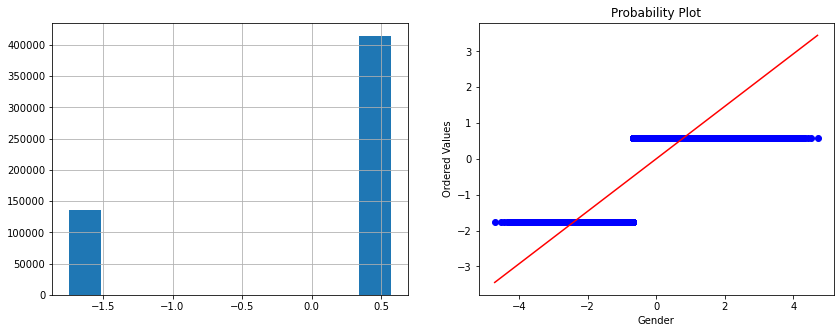

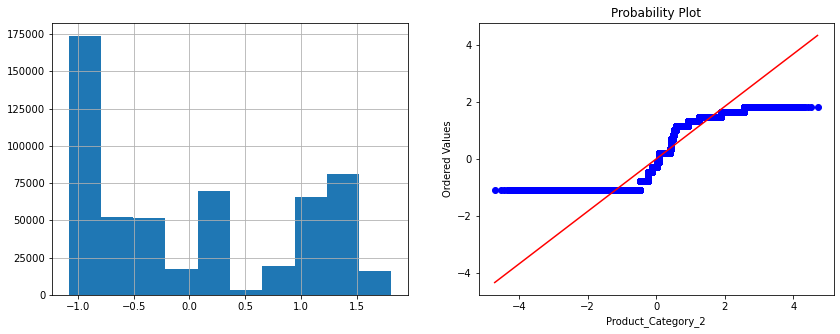

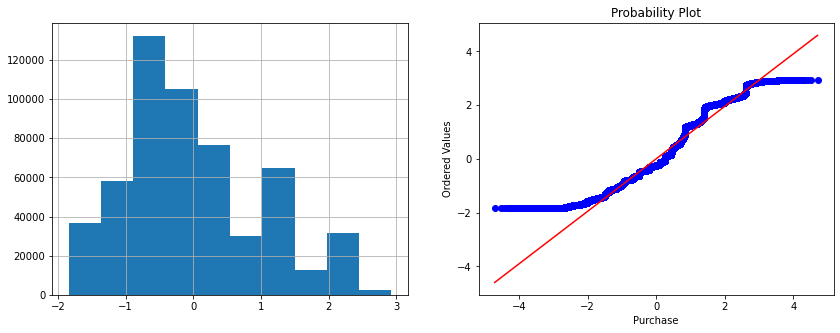

In [134]:
QQplot(df_scaled)

## <a>5.2 min-max

In [135]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df_new), columns = df_new.columns)
df_minmax.head()

,Product_Category_1,Product_Category_3,Product_ID,City_Category,Gender,Product_Category_2,Purchase
0,0.105263,0.000000,0.183589,0.0,0.0,0.000000,0.348992
1,0.000000,0.777778,0.662947,0.0,0.0,0.333333,0.634181
2,0.578947,0.000000,0.233683,0.0,0.0,0.000000,0.058875
3,0.578947,0.000000,0.227288,0.0,0.0,0.777778,0.043634
4,0.368421,0.000000,0.760204,1.0,1.0,0.000000,0.332248


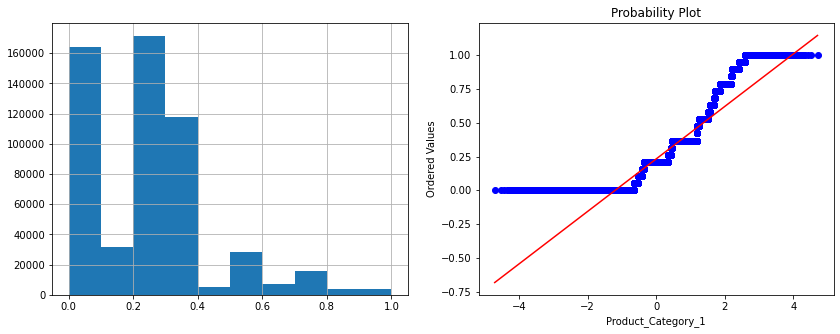

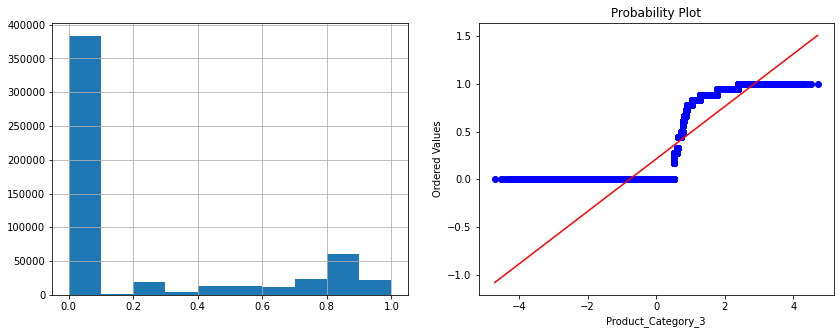

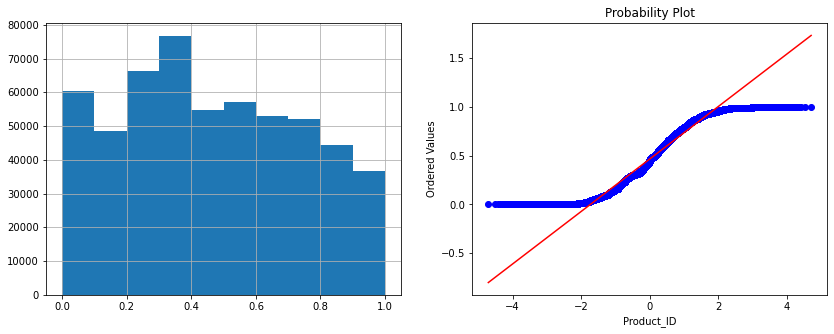

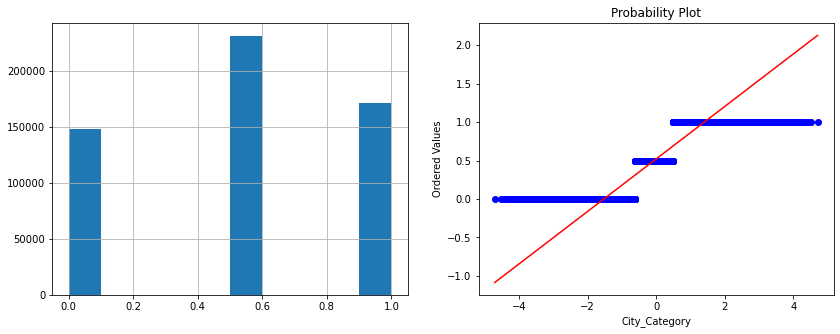

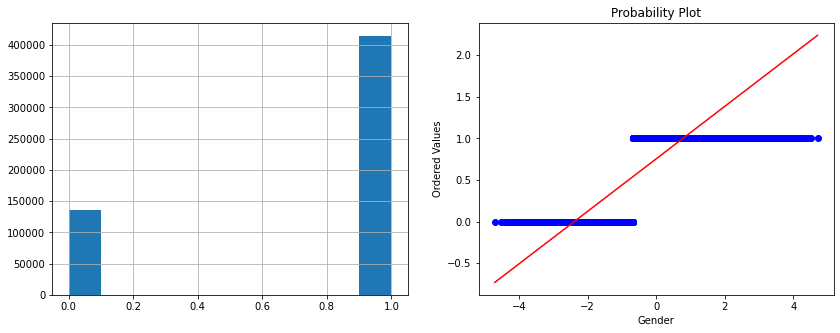

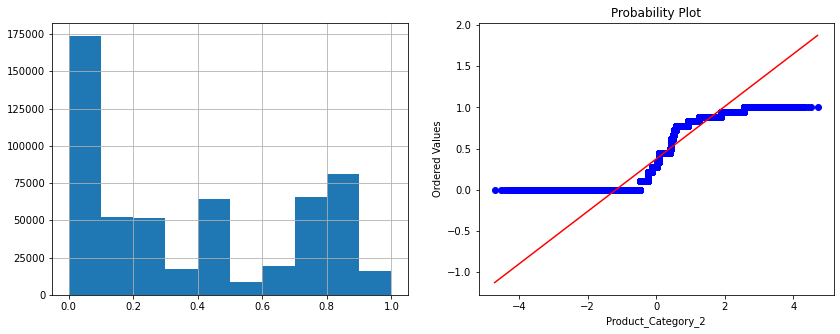

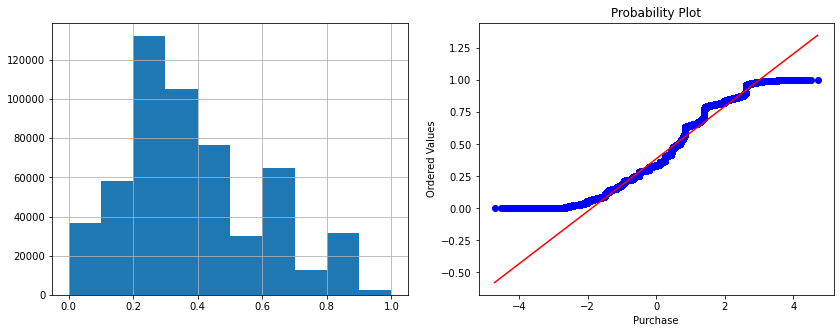

In [136]:
QQplot(df_minmax)

# <a>6. Linear Regression

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [148]:
X_train,X_test,Y_train,Y_test = train_test_split(df_scaled, df_new["Purchase"], test_size = 0.25, random_state = 0)
lr = LinearRegression()
lin_model = lr.fit(X_train,Y_train)

In [149]:
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

1.0
1.0


In [150]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print(adj_r2(X_train,Y_train))

print(adj_r2(X_test,Y_test))

1.0
1.0


In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [152]:
Y_pred=lin_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

2.490207212779569e-23
4.990197604082998e-12


H:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Purchase'>

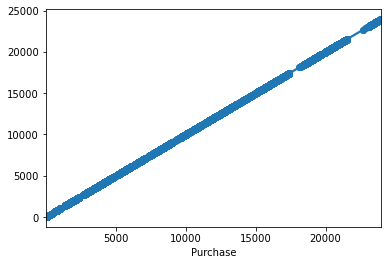

In [153]:
sns.regplot(Y_test,Y_pred)

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

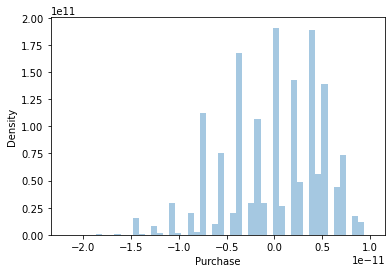

In [154]:
sns.distplot(Y_test-Y_pred)